In [2]:
import pandas as pd

df = pd.read_csv("E:/Downloads/validation_new.csv")
df.head()

,Price,Competitor Price,Discount,Elasticity Index,Storage Cost,Return Rate (%),Customer Reviews,Demand
0,244.99,255.88,0.00,1.21,8.31,23.14,4.77,1720
1,581.85,1588.73,0.14,1.15,11.34,2.13,3.49,484
2,932.98,933.96,0.09,1.12,13.67,12.61,4.07,1102
3,474.58,1471.14,0.28,0.60,28.41,2.92,2.85,1243
4,958.18,1997.32,0.15,1.26,18.70,20.68,4.61,50


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             15 non-null     float64
 1   Competitor Price  15 non-null     float64
 2   Discount          15 non-null     float64
 3   Elasticity Index  15 non-null     float64
 4   Storage Cost      15 non-null     float64
 5   Return Rate (%)   15 non-null     float64
 6   Customer Reviews  15 non-null     float64
 7   Demand            15 non-null     int64  
dtypes: float64(7), int64(1)
memory usage: 1.1 KB


In [4]:
x = df.drop("Demand",axis = 1)
y = df['Demand']

In [5]:
import joblib

model = joblib.load("rf_model_on_variety_synthetic_data.joblib")

In [6]:
x

,Price,Competitor Price,Discount,Elasticity Index,Storage Cost,Return Rate (%),Customer Reviews
0,244.99,255.88,0.00,1.21,8.31,23.14,4.77
1,581.85,1588.73,0.14,1.15,11.34,2.13,3.49
2,932.98,933.96,0.09,1.12,13.67,12.61,4.07
3,474.58,1471.14,0.28,0.60,28.41,2.92,2.85
4,958.18,1997.32,0.15,1.26,18.70,20.68,4.61
5,105.50,100.00,0.00,1.10,5.20,4.50,4.20
6,89.99,110.00,0.10,0.95,4.80,1.20,4.80
7,1250.00,1300.00,0.05,2.40,45.00,0.50,4.95
8,45.00,42.00,0.00,0.75,2.10,8.00,3.10
9,210.00,205.00,0.20,1.30,12.40,15.60,3.80


In [7]:
y_pred = model.predict(x)
y_pred

array([1829.1 , 1389.2 , 1135.65, 1952.3 , 1050.8 , 2045.3 , 2304.6 ,
        182.  , 1877.55, 2024.85,  980.25, 2029.95, 2171.75,   73.4 ,
       1963.  ])

In [8]:
y

0     1720
1      484
2     1102
3     1243
4       50
5      610
6     2100
7       85
8     3200
9      950
10     310
11    1450
12    1850
13      35
14    1120
Name: Demand, dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

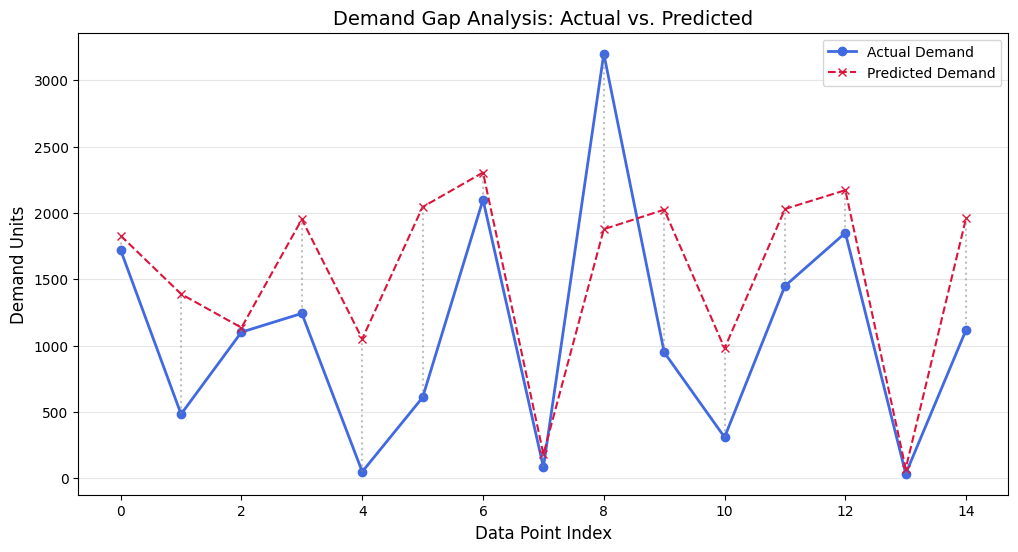

In [10]:
plt.figure(figsize=(12, 6))

# Plotting the Actual values
plt.plot(range(len(y)), y, label='Actual Demand', marker='o', color='royalblue', linewidth=2)

# Plotting the Predicted values
plt.plot(range(len(y_pred)), y_pred, label='Predicted Demand', marker='x', color='crimson', linestyle='--')

# Adding "Error Bars" to show the gap explicitly
for i in range(len(y)):
    plt.vlines(x=i, ymin=min(y.iloc[i], y_pred[i]), ymax=max(y.iloc[i], y_pred[i]), 
               color='gray', linestyle=':', alpha=0.5)

plt.title('Demand Gap Analysis: Actual vs. Predicted', fontsize=14)
plt.xlabel('Data Point Index', fontsize=12)
plt.ylabel('Demand Units', fontsize=12)
plt.legend()
plt.grid(True, axis='y', alpha=0.3)
plt.show()

In [11]:
import plotly.graph_objects as go

# 1. Create the figure
fig = go.Figure()

# 2. Add the Actual Demand line
fig.add_trace(go.Scatter(
    x=list(range(len(y))), 
    y=y,
    mode='lines+markers',
    name='Actual Demand',
    line=dict(color='royalblue', width=2),
    marker=dict(symbol='circle', size=8)
))

# 3. Add the Predicted Demand line
fig.add_trace(go.Scatter(
    x=list(range(len(y_pred))), 
    y=y_pred,
    mode='lines+markers',
    name='Predicted Demand',
    line=dict(color='crimson', width=2, dash='dash'),
    marker=dict(symbol='x', size=8)
))

# 4. Add the vertical "Error Gap" lines
# We use a separate loop to add shapes or traces for the gaps
for i in range(len(y)):
    fig.add_shape(
        type="line",
        x0=i, y0=y.iloc[i],
        x1=i, y1=y_pred[i],
        line=dict(color="gray", width=1, dash="dot"),
        opacity=0.5
    )

# 5. Update layout for better readability
fig.update_layout(
    title='Demand Gap Analysis: Actual vs. Predicted',
    xaxis_title='Data Point Index',
    yaxis_title='Demand Units',
    template='plotly_white',
    hovermode='x unified', # This shows both values when you hover over an index
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01)
)

fig.show()

---

## Checking Feature Importance for the trained model:

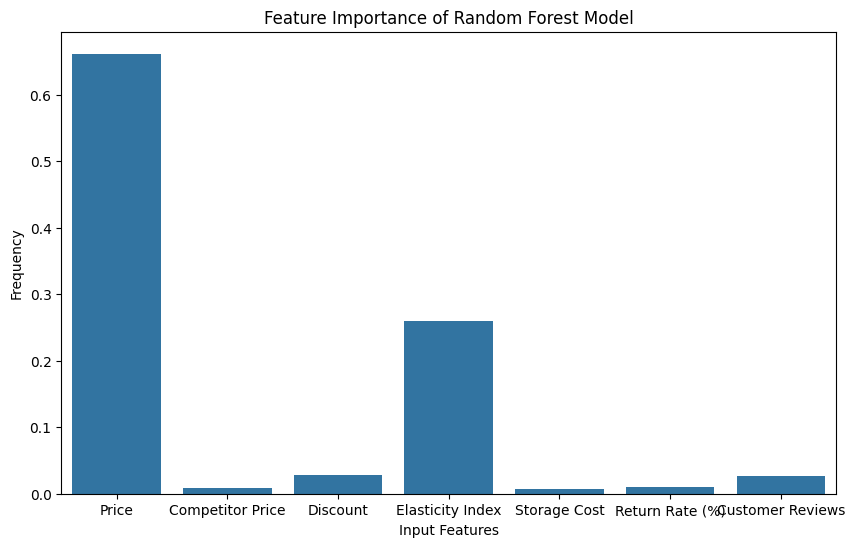

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(x=x.columns,y=model.feature_importances_)
plt.title("Feature Importance of Random Forest Model")
plt.xlabel("Input Features")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Selling the products with this price
baseline_price = x["Price"].values

# Increasing the price by 50%
x_new = x.copy()
x_new["Price"] = x_new["Price"] * 1.50

In [ ]:
'''
According to the model:
  1.how much demand would I expect at the current price?
  2.how much demand would I expect at the new (10% higher) price?”
'''

demand_base = model.predict(x)
demand_new  = model.predict(x_new)


# When price goes up by 10%, what fraction of demand remains?
demand_ratio = demand_new / (demand_base + 1e-6)

In [35]:
demand_ratio

array([0.97993549, 0.86625396, 0.60449963, 0.85972955, 0.46221926,
       0.99794651, 0.99726634, 0.31978022, 1.        , 0.92342643,
       0.48589645, 0.84452819, 0.99843444, 0.73569481, 0.80736118])

In [27]:
'''
Take the real observed demand
and apply the model's percentage change to it.
'''
adjusted_demand = y.values * demand_ratio

In [28]:
'''
How much money do I make:
  1.before the price change?
  2.after the price change?
'''

profit_base = baseline_price * y.values
profit_new  = x_new["Price"].values * adjusted_demand


In [29]:
profit_diff = profit_new - profit_base

In [30]:
profit_diff.mean()

np.float64(55795.45824483592)

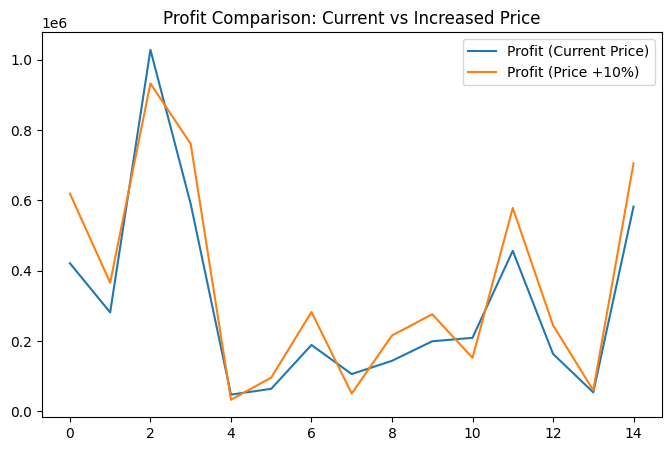

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(profit_base, label="Profit (Current Price)")
plt.plot(profit_new, label="Profit (Price +10%)")
plt.legend()
plt.title("Profit Comparison: Current vs Increased Price")
plt.show()


In [32]:
price_multipliers = [0.8, 0.9, 1.0, 1.1, 1.2]
avg_profits = []

for m in price_multipliers:
    x_tmp = x.copy()
    x_tmp["Price"] = x_tmp["Price"] * m
    
    d_base = model.predict(x)
    d_new = model.predict(x_tmp)
    
    ratio = d_new / (d_base + 1e-6)
    adj_demand = y.values * ratio
    
    profit = x_tmp["Price"].values * adj_demand
    avg_profits.append(profit.mean())


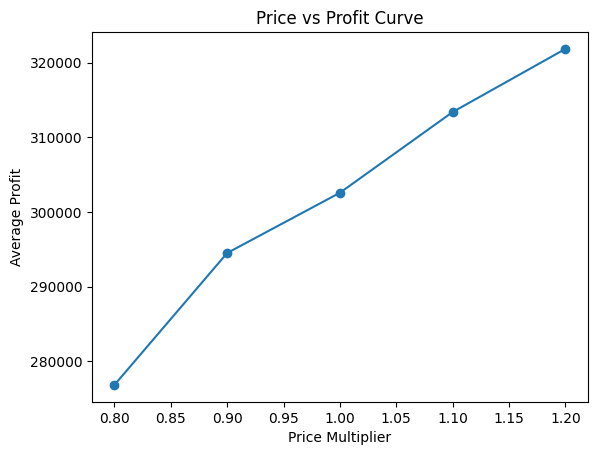

In [33]:
plt.plot(price_multipliers, avg_profits, marker="o")
plt.xlabel("Price Multiplier")
plt.ylabel("Average Profit")
plt.title("Price vs Profit Curve")
plt.show()
